# MATH 582 Final Project
Author: Jace Kline 2881618

### Project Description & Motivation

In this project, I aim to use health and fitness metrics scraped from my personal Garmin Connect account to analyze correlational relationships and perform dimensionality reduction, regression, classification, and clustering. The data is scraped from the time period of early June through late November and additionally exist across different time scales - daily and weekly. The metrics observed in the data sets include Calories burned, stress level, resting heart rate (BPM), steps, intensity minutes, and sleep hours. I chose this project because of my recent entrance into the world of endurance sports. I aim to leverage data science techniques learned in this class to derive useful and interesting results for myself as I continue on my endurance sports journey.


In [114]:
# imports

# base
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as mp
import seaborn as sb
from IPython.display import display

# models
from sklearn.decomposition import PCA

In [115]:
# load the cleaned data sets
dataloc = "./data/cleaned/"

daily = pd.read_csv(dataloc + "daily.csv").set_index('Date')
weekly = pd.read_csv(dataloc + "weekly.csv").set_index('Week')

dataset_labels = ["Daily", "Weekly"]
datasets = [daily, weekly]

In [116]:
def iterate_datasets(procedure):
    for df, lbl in zip(datasets, dataset_labels):
        procedure(df, lbl)

## Data Sets

In this section, we will describe and show the data sets used in the project. As discussed previously, the data comes from Garmin Connect and exists across daily and weekly time granularities. Hence, we utilize a daily and weekly data set. The data sets and their associated features are listed below:

* Daily metrics
  * Date
  * Intensity Minutes - the amount of time in a given day spent doing intense exercise
  * Steps - the number of steps taken in a given day
  * BPM - the average resting heart rate for a given day
  * Calories - the total number of calories burned in a given day
  * Stress Level - a Garmin score indicating the level of stress exhibited in a given day
  * Sleep Hrs - the number of hours slept for a given night


* Weekly metrics
  * Week - the date marking the first day of a seven day period
  * Intensity Minutes - the total intensity minutes in a given week
  * Steps - the average daily steps for a given week
  * BPM - the average resting heart rate over a given week
  * Calories - the total number of calories burned in a given week
  * Stress Level - The average daily stress level (Garmin score) over a given week
  * Sleep Hrs - The average number of hours slept per night over the course of a given week

In [117]:
# display the structure of the data sets

display(daily)
display(weekly)

,Intensity Minutes,Steps,BPM,Calories,Stress Level,Sleep Hrs
Date,,,,,,
2021-06-14,161,21590,47,3267,30,8.2
2021-06-15,134,14759,48,3408,29,8.3
2021-06-16,52,10272,47,2826,28,7.6
2021-06-17,37,11713,46,2733,26,7.5
2021-06-18,288,8882,45,3803,30,7.8
...,...,...,...,...,...,...
2021-11-17,0,18255,45,2568,35,6.4
2021-11-18,196,10532,50,3991,28,7.6
2021-11-19,139,11221,47,3899,30,6.8


,Intensity Minutes,Steps,BPM,Calories,Stress Level,Sleep Hrs
Week,,,,,,
2021-06-13,1062,104222,46,23725,28,7.3
2021-06-20,1391,81915,43,25984,26,8.0
2021-06-27,1185,87592,42,26098,25,7.6
2021-07-04,980,75470,40,23457,20,8.2
2021-07-11,923,95418,42,26423,26,7.7
2021-07-18,1504,97509,40,29752,23,7.8
2021-07-25,1079,81498,40,26396,26,7.6
2021-08-01,940,99351,40,26122,23,7.8
2021-08-08,1089,107402,39,25927,22,7.6


## Feature Correlation

In this section, we aim to show the correlation plots of features in our datasets that feature metrics broken down by day, week, and month. These different levels of granularity offer unique insights into the relationship of our different health metrics over the course of time. The results that we obtain in this section will help us narrow the scope and focus of our further analysis.

Daily Correlations:


,Intensity Minutes,Steps,BPM,Calories,Stress Level,Sleep Hrs
Intensity Minutes,1.000000,-0.004817,0.013302,0.891112,0.230212,-0.008866
Steps,-0.004817,1.000000,0.036418,0.015803,0.120824,-0.032524
BPM,0.013302,0.036418,1.000000,-0.055700,0.542060,-0.102004
Calories,0.891112,0.015803,-0.055700,1.000000,0.210885,-0.055961
Stress Level,0.230212,0.120824,0.542060,0.210885,1.000000,-0.281616
Sleep Hrs,-0.008866,-0.032524,-0.102004,-0.055961,-0.281616,1.000000


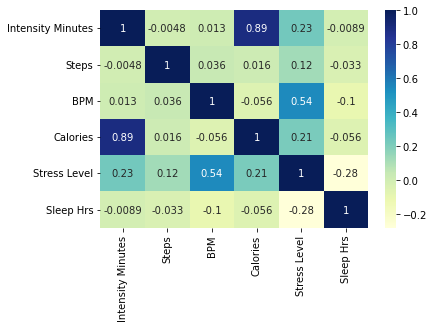

Weekly Correlations:


,Intensity Minutes,Steps,BPM,Calories,Stress Level,Sleep Hrs
Intensity Minutes,1.000000,0.484602,-0.166824,0.803882,0.052529,-0.112213
Steps,0.484602,1.000000,0.031067,0.549071,0.102130,-0.153504
BPM,-0.166824,0.031067,1.000000,-0.329999,0.714542,-0.304279
Calories,0.803882,0.549071,-0.329999,1.000000,0.031148,-0.117699
Stress Level,0.052529,0.102130,0.714542,0.031148,1.000000,-0.364152
Sleep Hrs,-0.112213,-0.153504,-0.304279,-0.117699,-0.364152,1.000000


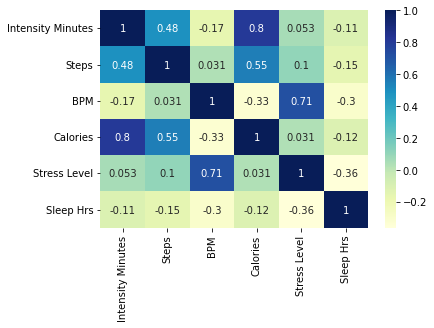

In [118]:
def display_correlations(df, lbl):
    print(f"{lbl} Correlations:")
    corr = df.corr()
    display(corr)
    
    sb.heatmap(corr, cmap="YlGnBu", annot=True)
    mp.show()

# for lbl, df in zip(dataset_labels, datasets):
#     display_correlations(df, lbl)

iterate_datasets(display_correlations)

### Discussion

These correlation plots show us that the number of hours of sleep per night are negatively correlated with all other features. This is most pronounced on the weekly scale as opposed to the daily scale. Additionally, we see that stress level and resting heart rate (BPM) are significantly positively correlated in both the daily and weekly time scales. This indicates that both acute and prolonged stress associate with an increase in heart rate. Intuitively, we see that steps, intensity minutes, and Calories burned are all significantly positively correlated. The overlapping information stored within all these features present the possible success of dimensionality reduction on the data.

## Dimensionality Reduction (PCA & SVD)

As touched on in the feature correlation discussion, the shared information and high correlations present between features in the data present the possible success of dimensionality reduction using principal component analysis (PCA) and singular value decomposition (SVD) on the data. The dimension-reduced data sets can then be utilized in further models leveraging these data sets.

In [119]:
# Define SVD Reducer function

# X: Data set with D columns (features), N rows (samples)
# M: the number of dimensions to reduce to where M <= D
def svd_reduce(X, M):
    U, singular_values, Vt = np.linalg.svd(X.T, full_matrices=False, compute_uv=True)
    Sigma = np.diag(singular_values)
    return (U[:,0:M] @ Sigma[0:M,0:M] @ Vt[0:M,:]).T

In [120]:
# PCA Reducer function

# X: Data set with D columns (features), N rows (samples)
# M: the number of dimensions to reduce to where M <= D
# transforms the shape of data matrix back to original space
def pca_reduce(X, M):
    pca = PCA(n_components=M)
    return pca.inverse_transform(pca.fit_transform(X))

In [121]:
def svd_vs_pca_err(X):
    N, D = X.shape
    results = []

    for M in range(1, D):
        svd_err = np.linalg.norm(X - svd_reduce(X, M))
        pca_err = np.linalg.norm(X - pca_reduce(X, M))
        results.append((M, svd_err, pca_err))

    return pd.DataFrame(results, columns=['Dimensions', 'SVD Error', 'PCA Error']).set_index('Dimensions')

def dim_reduction_results(df, lbl):
    print(f"SVD vs PCA on the {lbl} data set:")
    res = svd_vs_pca_err(df.to_numpy())
    display(res)

In [122]:
iterate_datasets(dim_reduction_results)

SVD vs PCA on the Daily data set:


,SVD Error,PCA Error
Dimensions,,
1,21408.168410,8372.937145
2,900.337623,569.809540
3,112.363766,84.837617
4,48.769969,39.302108
5,13.058150,11.063983


SVD vs PCA on the Weekly data set:


,SVD Error,PCA Error
Dimensions,,
1,20126.822675,7443.067632
2,1005.308563,779.209994
3,32.182790,25.371795
4,11.706628,8.511178
5,2.625951,2.121780
